<a href="https://colab.research.google.com/github/rochactivo-UPC/dynLAB/blob/main/P1_Din.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Importar librerías necesarias:
Importar librerías necesarias: Necesitarás librerías como NumPy para manipulación de arrays, Matplotlib para gráficas, y SciPy para integración.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz
import pandas as pd

#2 Cargar los datos:
Puedes subir los archivos con tus datos de señales de aceleración directamente a Colab o cargarlos desde Google Drive si los tienes almacenados allí.
Para leer los datos de aceleración utiliza, por ejemplo, numpy.loadtxt o pandas.read_csv

(archivos v09808.020 y v09808.093)

In [3]:
# Ejemplo de carga de datos desde un archivo CSV
# Asegúrate de haber subido el archivo a tu entorno de Colab primero
file_path = '/content/v09808.020'
datos = pd.read_csv(file_path, sep='\t', header=None, names=['tiempo', 'aceleracion'])

Previsualizar los datos para verificar que se cargaron correctamente

In [13]:
datos.head()

,tiempo,aceleracion
0,-0.0500,1.892675
1,-0.0499,4.238815
2,-0.0498,4.238815
3,-0.0497,4.238815
4,-0.0496,4.238815


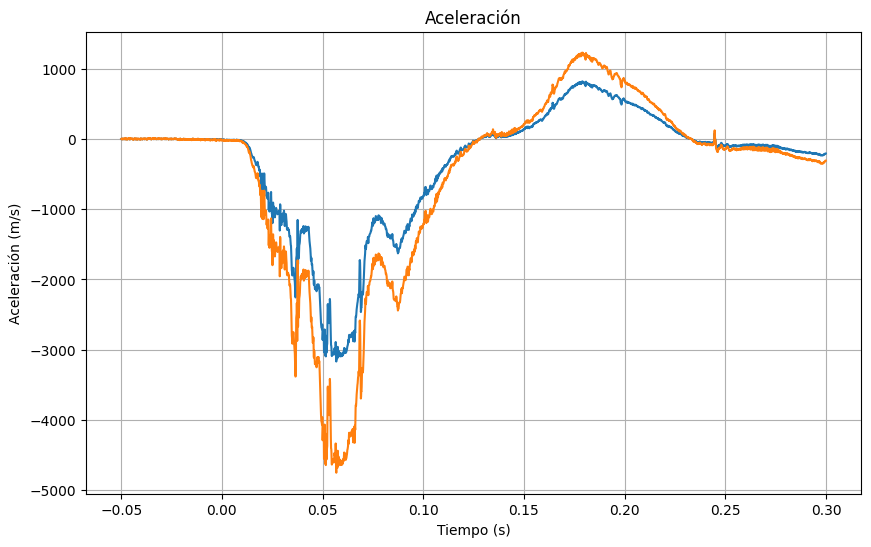

In [11]:
# Cambiar unidades
datos['aceleracion'] = datos['aceleracion']*9.81

# Visualizar el resultado de la integración
plt.figure(figsize=(10, 6))
plt.plot(datos['tiempo'], datos['aceleracion'])
plt.xlabel('Tiempo (s)')
plt.ylabel('Aceleración (m/s)')
plt.title('Aceleración')
plt.grid(True)
plt.show()


#4 Integración en el tiempo
Para computar a partir de los datos de aceleración la velocidad y desplazamiento hay que integrar en el tiempo.

La velocidad inicial en el momento del impacto es 56.17 km/h [= 15.60 m/s] como detalla la página (iii) del reporte en pdf, esta constante de integración debe considerarse en la primera integración


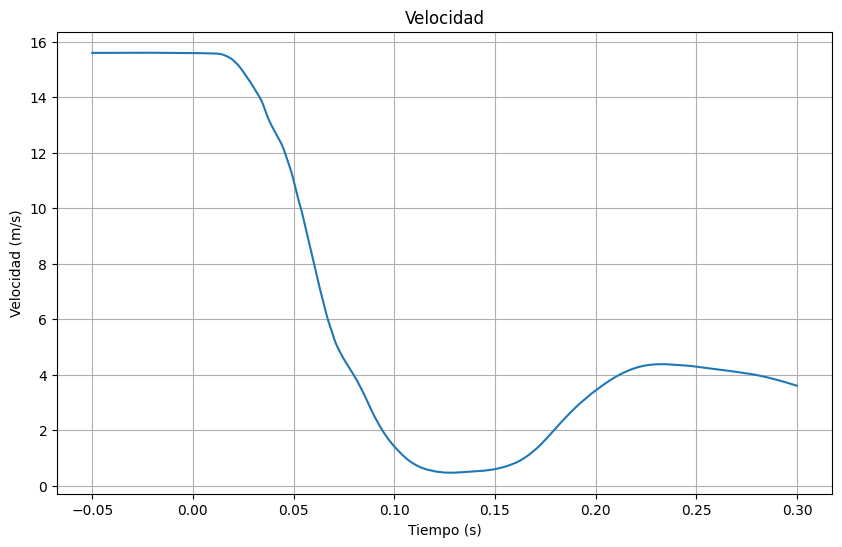

In [9]:
velocidadInicial = 15.6 #m/s

velocidad = cumtrapz(datos['aceleracion'], datos['tiempo'], initial=0)
velocidad += velocidadInicial

# Visualizar el resultado de la integración
plt.figure(figsize=(10, 6))
plt.plot(datos['tiempo'], velocidad)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Velocidad')
plt.grid(True)
plt.show()


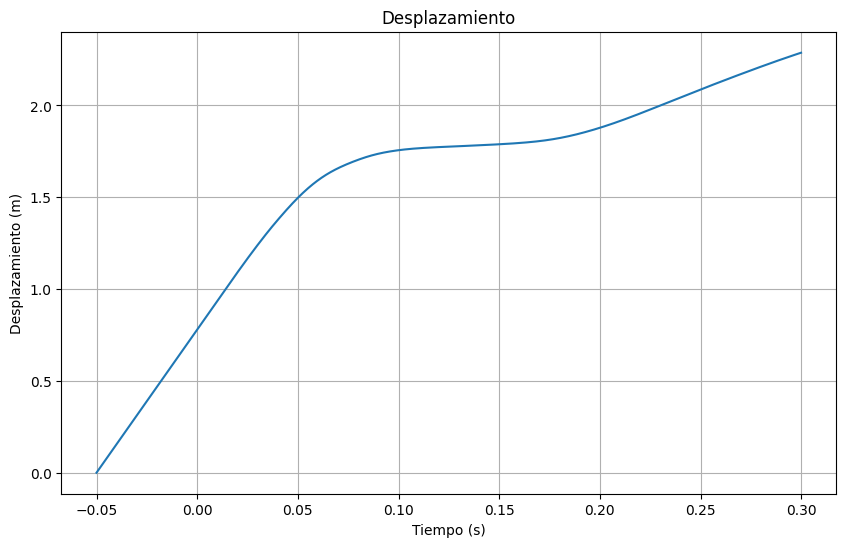

In [10]:
desplazamiento = cumtrapz(velocidad, datos['tiempo'], initial=0)

# Visualizar el resultado de la integración
plt.figure(figsize=(10, 6))
plt.plot(datos['tiempo'], desplazamiento)
plt.xlabel('Tiempo (s)')
plt.ylabel('Desplazamiento (m)')
plt.title('Desplazamiento')
plt.grid(True)
plt.show()